In [2]:
import pandas as pd
import glob
import numpy as np
import json
import math
from natsort import natsorted
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# model predictions

In [3]:
df60k = pd.read_json('/home/ravi/raviProject/DataModelsResults/Results/GBM/Labeled_2261_test_yPred_lightGBM.json', orient='records')

In [4]:
df60k = df60k.rename(columns={"label": "Label", "text": "reply"})

In [5]:
df60k.head(1)

,replyDate,reply,telegramChannel,Label,y_pred
0,1671051885,We need the return of Jesus Christ !!!!!,TrumpSupportersChannel.json,0,0


In [6]:
df60k['y_pred'].value_counts()

0    948
2    665
1    648
Name: y_pred, dtype: int64

In [7]:
# Print the first few rows to verify
df60k.head()

,replyDate,reply,telegramChannel,Label,y_pred
0,1671051885,We need the return of Jesus Christ !!!!!,TrumpSupportersChannel.json,0,0
1,1640990640,I don’t care about him retiring! I want to kno...,AnalyzingAmerica.json,1,0
2,1655419773,The gallows have claimed him already,TrumpSupportersChannel.json,2,0
3,1668105585,We The People need to see EBS and military SOO...,ThePatriotVoice.json,0,2
4,1692627228,DEWs shot down to murder the locals in the way...,ResisttheMainstream.json,0,2


In [8]:
precision_score(df60k['Label'], df60k['y_pred'], average='weighted')

0.7557090847528433

In [9]:
recall_score(df60k['Label'], df60k['y_pred'], average='weighted')

0.7390535161432994

In [10]:
f1_score(df60k['Label'], df60k['y_pred'], average='weighted')

0.741320650132949

In [11]:
accuracy_score(df60k['Label'], df60k['y_pred'])

0.7390535161432994

In [12]:
# Generate classification report
class_report = classification_report(df60k['Label'], df60k['y_pred'])

In [13]:
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.80      0.70       753
           1       0.80      0.74      0.77       699
           2       0.83      0.69      0.75       809

    accuracy                           0.74      2261
   macro avg       0.75      0.74      0.74      2261
weighted avg       0.76      0.74      0.74      2261



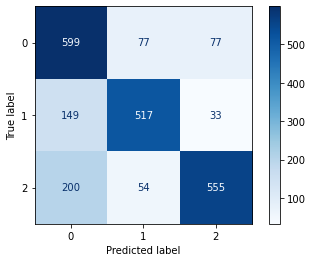

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import pandas as pd

# Assuming 'df60k' DataFrame with 'Label' and 'y_pred' columns exists

# Calculate the confusion matrix
conf_matrix = confusion_matrix(df60k['Label'], df60k['y_pred'])

# Create a ConfusionMatrixDisplay instance
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1, 2])

# Plot the confusion matrix
cm_display.plot(cmap='Blues', values_format='d')

# Show the plot
plt.show()

In [15]:
conf_matrix

array([[599,  77,  77],
       [149, 517,  33],
       [200,  54, 555]])